In [53]:
%matplotlib inline

import math

import numpy as np

from pandas import DataFrame
from pandas import concat

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

In [3]:
#MATLAB colors
colors = [[0, 0.4470, 0.7410],
          [0.8500, 0.3250, 0.0980],
          [0.9290, 0.6940, 0.1250],
          [0.4940, 0.1840, 0.5560],
          [0.4660, 0.6740, 0.1880],
          [0.3010, 0.7450, 0.9330],
          [0.6350, 0.0780, 0.1840]];

colormap = plt.get_cmap('rainbow')

def getColor(num, brightness=1):
    col = colors[num]
    return [col[0]*brightness, col[1]*brightness, col[2]*brightness]

In [4]:
N = 25 #Number of experiments
size_of_msg = 0 #number of relevant bytes in a message (to be computed as we load the logs)
size_of_interaction = 3 #number of messages in complete interactions between client and server

def logToPositions(filename):
    global size_of_msg
    file = open(filename)
    comments = 0
    found_christmas = False
    while True:
        line = file.readline()
        if not line:
            break
        elif line.startswith('#CLI: What are you waitin for? Christmas?'):
            found_christmas = True
        elif line.startswith('#CLI: Heh, heh, heh... what a mess!'):
            raise Exception('There was an error in the execution of this protocol ' + filename)
        elif line.startswith('#CLI:') or line.startswith('#APP:'):
            continue
        elif line.startswith('#'):
            positions = line[1:].strip().split(',')[:-1]
            if (size_of_msg == 0):
                size_of_msg=len(positions)
            for p in positions:
                yield float(p)
    if not found_christmas:
        print('WARNING! Logs may not be complete for ' + filename)

In [5]:
def  loadAllPositions(base, N, pad=False):
    all_positions = []
    max_len = 0
    for i in range(1,N+1):
        positions = list(logToPositions(base+str(i)+'.log'))
        if len(positions) > max_len:
            max_len = len(positions)
        all_positions.append(np.array(list(positions)))
    if pad:
        for i in range(0,len(all_positions)):
            all_positions[i] = np.pad(all_positions[i], (0, max_len-len(all_positions[i])), 'constant', constant_values=np.nan)        
    return all_positions

WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs1.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs2.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs3.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs5.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs6.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs8.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs9.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs10.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs11.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs12.log
WARNING! Logs may not be co

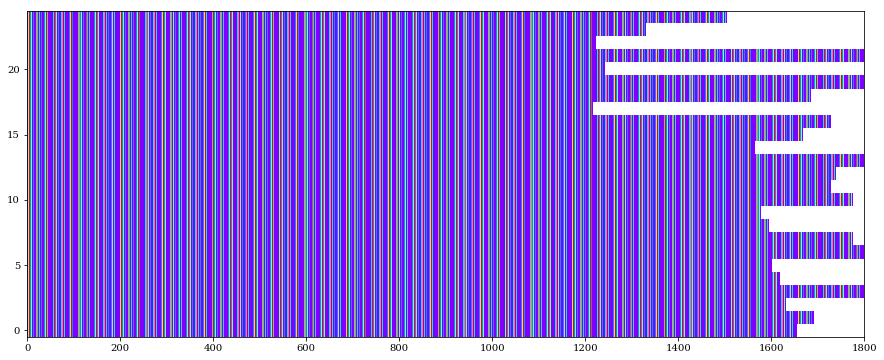

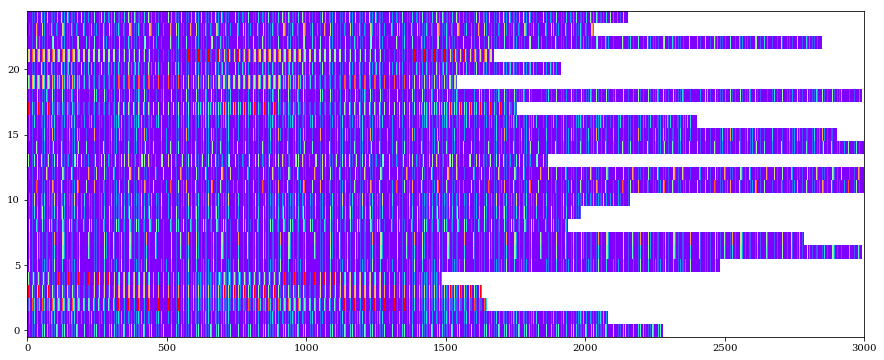

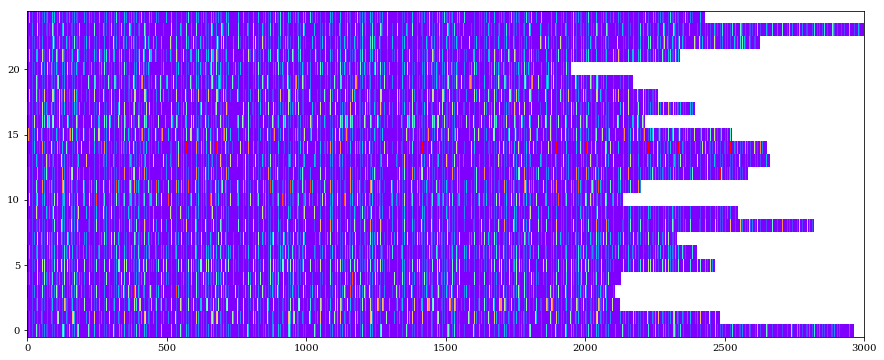

In [6]:
base_dir = '../../../target/thingml-bytes-logs/nodejs/'

base_positions = np.array(loadAllPositions(base_dir+'base/nodejs', N, pad=True))
static_positions = np.array(loadAllPositions(base_dir+'static/nodejs', N, pad=True))
runtime_positions = np.array(loadAllPositions(base_dir+'dynamic/nodejs', N, pad=True))

print(base_positions.shape)
print(static_positions.shape)
print(runtime_positions.shape)


plt.figure(1, figsize=(15,6))
plt.imshow(base_positions, interpolation='nearest', origin='lower', aspect='auto', cmap=colormap)
plt.savefig('picture_raw_positions_base.png', dpi=300)
plt.show()
plt.figure(2, figsize=(15,6))
plt.imshow(static_positions, interpolation='nearest', origin='lower', aspect='auto', cmap=colormap)
plt.savefig('picture_raw_positions_static.png', dpi=300)
plt.show()
plt.figure(3, figsize=(15,6))
plt.imshow(runtime_positions, interpolation='nearest', origin='lower', aspect='auto', cmap=colormap)
plt.savefig('picture_raw_positions_runtime.png', dpi=300)
plt.show()

In [22]:
train_ratio = 0.67 #67% of the data will be used for training

def split_train_test(data):
    train_test = np.empty([len(data),2], dtype=object)
    for i in range(0,len(data)):
        train_size = int(len(data[i]) * train_ratio)
        test_size = len(data[i]) - train_size
        train, test = data[i][0:train_size], data[i][train_size:len(data[i])]
        train_test[i][0] = train 
        train_test[i][1] = test
    return train_test

#Scale data to fit into y=[0,1]
#train = MinMaxScaler().fit_transform(train.reshape(-1, 1))
#test = MinMaxScaler().fit_transform(test.reshape(-1, 1))

base_positions = np.array(loadAllPositions(base_dir+'base/nodejs', N))
static_positions = np.array(loadAllPositions(base_dir+'static/nodejs', N))
runtime_positions = np.array(loadAllPositions(base_dir+'dynamic/nodejs', N))

base = split_train_test(base_positions)
static = split_train_test(static_positions)
runtime = split_train_test(runtime_positions)

print(base[0][0].shape)
print(base[0][1].shape)

base_train = np.array(base[:, 0])
base_test = np.array(base[:, 1])
static_train = np.array(static[:, 0])
static_test = np.array(static[:, 1])
runtime_train = np.array(runtime[:, 0])
runtime_test = np.array(runtime[:, 1])

print(base_train[0].shape)
print(base_test[0].shape)


WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs1.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs2.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs3.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs5.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs6.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs8.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs9.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs10.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs11.log
WARNING! Logs may not be complete for ../../../target/thingml-bytes-logs/nodejs/base/nodejs12.log
WARNING! Logs may not be co

In [56]:
number_of_interactions = 3
size_of_window = number_of_interactions * size_of_interaction * size_of_msg

print('size_of_window = ', size_of_window)

"""
See https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
"""
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    
# for i in range(0,len(base_train)):
#     print(i)
#     print(base_train[i])
#     base_train[i] = series_to_supervised(list(base_train[i]), size_of_window, 1)
    
print(base_train[0].shape)
    
train = series_to_supervised(list(runtime_train[24]), 54, 1)
test = series_to_supervised(list(runtime_test[24]), 54, 1)    

print(train.shape)
print(test.shape)

size_of_window =  54
(1109,)
(1574, 55)
(748, 55)


In [60]:
def reshape(train, test):
    train_X = np.array(train.iloc[:,0:-1])
    train_Y = np.array(train.iloc[:,-1])
    test_X = np.array(test.iloc[:,0:-1])
    test_Y = np.array(test.iloc[:,-1])

    train_Y = np.reshape(train_Y, (train_Y.shape[0],1))
    test_Y = np.reshape(test_Y, (test_Y.shape[0],1))

    #FIXME: make a function
    n = train_X.shape[0]
    L = 3
    X_train_seq = []
    Y_train_seq = []
    for k in range(n - L + 1):
        X_train_seq.append(train_X[k : k + L])
        Y_train_seq.append(train_Y[k : k + L])
    train_X = np.array(X_train_seq)
    train_Y = np.array(Y_train_seq)

    #FIXME: make a function
    n = test_X.shape[0]
    L = 3
    X_test_seq = []
    Y_test_seq = []
    for k in range(n - L + 1):
        X_test_seq.append(test_X[k : k + L])
        Y_test_seq.append(test_Y[k : k + L])
    test_X = np.array(X_test_seq)
    test_Y = np.array(Y_test_seq)
    
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = reshape(train, test)

def keras_model(x, y):
    model = keras.Sequential()
    model.add(keras.layers.Dense(x, input_shape=(y, x)))
    model.add(keras.layers.LSTM(x, input_shape=(y, x), return_sequences=True))
    model.add(keras.layers.Dense(x))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer="adam")
    return model

model = keras_model(train_X.shape[2], train_X.shape[1])

def train_and_save(model, train_X, train_Y):

    model.fit(train_X, train_Y, batch_size=12, epochs=train_X.shape[2]*2, verbose=2)
    model.summary()

    json = model.to_json()
    text_file = open("tf_model.json", "w")
    text_file.write(json)
    text_file.close()

    keras.models.save_model(model, base_dir + 'model.h5', overwrite=True, include_optimizer=True)
    result = model.evaluate(test_X, test_Y)
    print(result)
    return model
    
model = train_and_save(model, train_X, train_Y)

Epoch 1/108
 - 2s - loss: 0.3660
Epoch 2/108
 - 0s - loss: 0.1401
Epoch 3/108
 - 0s - loss: 0.1028
Epoch 4/108
 - 0s - loss: 0.0771
Epoch 5/108
 - 0s - loss: 0.0642
Epoch 6/108
 - 0s - loss: 0.0550
Epoch 7/108
 - 0s - loss: 0.0528
Epoch 8/108
 - 0s - loss: 0.0520
Epoch 9/108
 - 0s - loss: 0.0520
Epoch 10/108
 - 0s - loss: 0.0449
Epoch 11/108
 - 0s - loss: 0.0449
Epoch 12/108
 - 0s - loss: 0.0431
Epoch 13/108
 - 0s - loss: 0.0426
Epoch 14/108
 - 0s - loss: 0.0448
Epoch 15/108
 - 0s - loss: 0.0388
Epoch 16/108
 - 0s - loss: 0.0409
Epoch 17/108
 - 0s - loss: 0.0400
Epoch 18/108
 - 0s - loss: 0.0403
Epoch 19/108
 - 0s - loss: 0.0377
Epoch 20/108
 - 0s - loss: 0.0385
Epoch 21/108
 - 0s - loss: 0.0377
Epoch 22/108
 - 0s - loss: 0.0360
Epoch 23/108
 - 0s - loss: 0.0357
Epoch 24/108
 - 0s - loss: 0.0369
Epoch 25/108
 - 0s - loss: 0.0362
Epoch 26/108
 - 0s - loss: 0.0360
Epoch 27/108
 - 0s - loss: 0.0343
Epoch 28/108
 - 0s - loss: 0.0352
Epoch 29/108
 - 0s - loss: 0.0366
Epoch 30/108
 - 0s - lo

In [62]:
def predict(test_X, test_Y):

    predictions = model.predict(test_X)
    predictions = np.round(predictions)

#     plt.figure(4, figsize=(20,15))
#     plt.plot(predictions.flatten())
#     plt.plot(test_Y.flatten())
#     plt.show()

    error = np.abs(test_Y.flatten() - predictions.flatten())
    condition = np.equal(error, 0)
    matches = np.extract(condition, error)
    
#     plt.figure(5, figsize=(20,15))
#     plt.plot(error)
#     plt.show()

    RMSD = round(math.sqrt(np.sum(error**2)/len(error)),2)
    match_ratio = round((len(matches)/len(error)*100),2)

    return match_ratio, RMSD
    
    
match_ratio, RMSD = predict(test_X, test_Y)
print('RMSD = ', RMSD)
print(match_ratio, '% match')

RMSD =  0.29
93.07 % match
